In [1]:
import scipy 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd

data = np.random.randn(10000)
# sort the data:
data_sorted = np.sort(data)

p = np.linspace(0, 1, len(data), endpoint=False)

def f(x): return np.interp(x, p, data_sorted)

# Q.1 
**[Stat, Python] How to create a CDF in Python?**

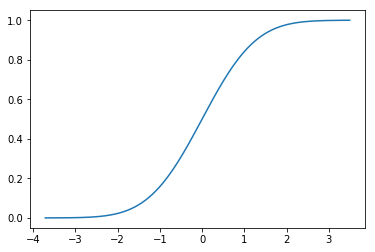

In [2]:
# for unbiased estimator of cdf

# OR WE CAN DO THE SAME USING SCIPY

# generate samples from normal distribution (discrete data)
x = np.random.randn(10000)
norm_cdf = scipy.stats.norm.cdf(x)  # calculate the cdf - also discrete
# plot the cdfk
sns.lineplot(x=x, y=norm_cdf) 
plt.show()

# Q.2
**[Stat, Python] How to create a PDF in Python? Remember we introduced Probabilistic Programming. One of the most popular libraries for this is PYMC3. You may look into here: https://pymc3.readthedocs.io/en/latest/prob_dists.html 
Another way to approach  this question is through this package : https://pypi.org/project/fitter/**

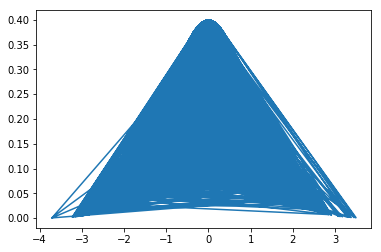

In [5]:
#plot the pdf
plt.plot(x, scipy.stats.norm.pdf(x))
plt.show()

# Q.3

**[Stat, Python] How to create a PMF in Python?**

In [6]:
#plot the pmf
def cnt_vals(num_arr):
    cnt = Counter()
    for num in x:
        num = int((num*1000))//100
        cnt[num] += 1
    return cnt

# Q.4
**[Stat, Python] Create a function that converts any list into a PMF. 
		a. The function should return a dictionary with keys as the data values and values as the corresponding PMF values. PS! This assumes you have a discrete random variable.
		b. The function has to be implemented in 2 ways:
			i. Using some type of sum operator
Using the len-operator (Hint : use Counter(data) )**

In [7]:
def pmf(num_arr):
    n_nums = len(num_arr)
    nums_cnt = dict(cnt_vals(num_arr))
    for i in nums_cnt.keys():
        nums_cnt[i] = nums_cnt[i]/n_nums
    return nums_cnt

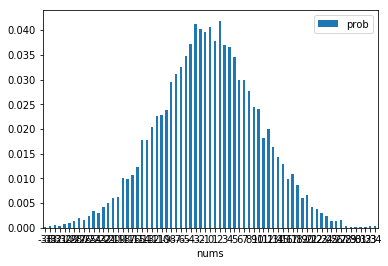

In [8]:
pmf_calc = pmf(x)

nums = list(pmf_calc.keys())
prob = list(pmf_calc.values())
data = pd.DataFrame({'nums':nums, 'prob':prob}).sort_values(by='nums')

data.plot.bar(x='nums', y='prob', rot=0)

In [9]:
def pmf_2(vals_arr):
    vals_cnt = cnt_vals(vals_arr)
    num_sum = 0
    for i in vals_cnt.values():
        num_sum += i
    for i in vals_cnt.keys():
        vals_cnt[i] = vals_cnt[i]/num_sum
    return vals_cnt

In [10]:
pmf_calc = pmf_2(x)
nums = list(pmf_calc.keys())
prob = list(pmf_calc.values())
data = pd.DataFrame({'nums':nums, 'prob':prob}).sort_values(by='nums')

# Q.5 
**[Pandas, Stat, Python] Plot the resulting PMF using Pandas inbuilt plot command with 'bar' parameter. Make sure that the Series passed is sorted by the index. Use a decorator to make sure that is the case. If you want to recollect what is a decorator**

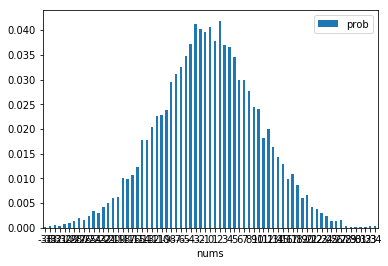

In [11]:
data.plot.bar(x='nums', y='prob', rot=0)

# Q.6
**[Functional Programming, Stat] Using the given lambda expression, tabulate the derived CDF at 4 arbitrarily chosen values (you can define them yourself).
		a. f = lambda x: np.interp(x, p, data_sorted)
	HINT: https://stats.stackexchange.com/questions/239937/empirical-cdf-vs-cdf
Note that CDF and EMPIRICAL CDF are not the same thing!**

In [12]:
def rand_4_nums(num_arr):
    out_arr = []
    for i in np.random.randint(0, len(num_arr), 4):
        out_arr.append(num_arr[i])
    return out_arr

In [13]:
rand_num_list = rand_4_nums(f(x))
rand_num_list

[-3.9759420612593455,
 3.779876355414532,
 0.2627440131119958,
 -0.16071886705220634]

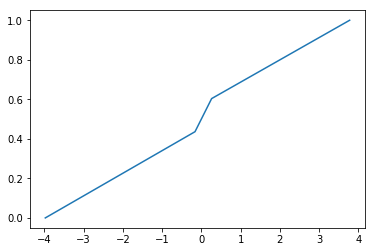

In [14]:
norm_cdf = scipy.stats.norm.cdf(rand_num_list)
sns.lineplot(x=rand_num_list, y=norm_cdf) 
plt.show()

# Q. 7
**Analyze the percentiles (codes given on Q 8 below) of the array used in point 3 using this function. You may use the Python file given and the percentile function defined below.
		a. What do you notice?**


The functionality of this method takes in a list of SORTED values, a percent(The PERCENTILE value requested), key (function which returns a k:v pair. From this, we first determine if the index created by multiplying length of our list by the percent is a whole number; this is important because indeces are whole numbers. Next this method calculates an upper and lower limit which contains the percentile value requested. This will increase the accuracy of our return value later. NOTE: if "f" was whole number then k is returned as an int which represents the percentile value requested. If not, then f and c are averaged and then returned as a sum. This ensures in the outlier case that, when the percentile value falls between two values, the weighted average of those two values are returned.

# Q. 8 
**[Functional Programming] Define a partial function that always find the 25% of a given array (first quartile). Use the percentile function definition given below.**<br/>
def percentile(N, percent, key=lambda x:x): <br/>
    """
    Find the percentile of a list of values.<br/>

    @parameter N - is a list of values. Note N MUST BE already sorted. <br/>
    @parameter percent - a float value from 0.0 to 1.0. <br/>
    @parameter key - optional key function to compute value from each element of N. <br/>

    @return - the percentile of the values <br/>
    """
    if N is None:<br/>
        return None
    k = (len(N)-1) * percent <br/>
    f = math.floor(k)<br/>
    c = math.ceil(k)<br/>
    if f == c:<br/>
        return key(N[int(k)])<br/>
    d0 = key(N[int(f)]) * (c-k)<br/>
    d1 = key(N[int(c)]) * (k-f)<br/>
    return d0+d1<br/>



**Solution one for Q.8**

In [15]:

import math
import functools

def percentile(N, percent, key=lambda x:x):
   if N is None:
       return None
   k = (len(N)-1) * percent
   f = math.floor(k)
   c = math.ceil(k)
   if f == c:
       return key(N[int(k)])
   d0 = key(N[int(f)]) * (c-k)
   d1 = key(N[int(c)]) * (k-f)
   return d0+d1


percentile = functools.partial(percentile, percent=0.25)

**Alternative solution for Q.8** we can just simmply give the percent value parameter directly 

In [16]:
def percentile(N, percent=0.25, key=lambda x:x): 

    """ 

    Find the percentile of a list of values. 

 

    @parameter N - is a list of values. Note N MUST BE already sorted. 

    @parameter percent - a float value from 0.0 to 1.0. 

    @parameter key - optional key function to compute value from each element of N. 

 

    @return - the percentile of the values 

    """ 

    if N is None: 

        return None 

    k = (len(N)-1) * percent 

    f = math.floor(k) 

    c = math.ceil(k) 

    if f == c: 

        return key(N[int(k)]) 

    d0 = key(N[int(f)]) * (c-k) 

    d1 = key(N[int(c)]) * (k-f) 

    return d0+d1 